<a href="https://colab.research.google.com/github/nebojsa-bozanic/OSuM/blob/master/OSuM_Vezba3/OSuM_Vezba3/OSuM_vezba_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Obrada slike u medicini (BMI)</h1>

Literatura: https://moodle.telekom.ftn.uns.ac.rs/course/view.php?id=82

Laboratorijska vežba 3:
Multiveličinska analiza: Gausova i Laplasova piramida

Potrebne biblioteke: math, scipy, cv2, numpy, matplotlib.pyplot

In [2]:
!git clone https://github.com/nebojsa-bozanic/OSuM.git
%cd /content/OSuM/OSuM_Vezba3/OSuM_Vezba3

fatal: destination path 'OSuM' already exists and is not an empty directory.
/content/OSuM/OSuM_Vezba3/OSuM_Vezba3


In [3]:
import osum
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import convolve1d

<ipython-input-3-042564f3b4bc>:5: DeprecationWarning: Please use `convolve1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve1d


1. Gausov filtar
  
  1.1 U modulu osum.py napisati funkciju gaussian koja pravi 1D Gausov filtar. Parametri filtra su broj odbiraka (n) i standardna devijacija (sigma). Definisati default-ne vrednosti za parametre. Proizvoljno, izlaz funkcije takođe može biti i x-osa za crtanje grafika. Jednodimenzionalni Gausov filtar dat je izrazom:

𝐺(𝑥) = 1√2𝜋𝜎!𝑒" #!!$!

  1.2 U glavnoj skripti vezba3.py pomoću prethodno definisane funkcije napraviti Gausov filtar f sa parametrima n=7 i sigma=1.5. Koliko iznosi vrednost centralnog, a koliko vrednost ugaonih koeficijenata (odbiraka) ovog filtra?

  1.3 Prikazati koeficijente ovog filtra.
  
  1.4 Isprobati nekoliko različitih kombinacija n i sigma. Kakav efekat imaju ovi parametri na izgled filtra i vrednosti njegovih koeficijenata?
  
  1.5 Napraviti 2D Gausov filtar vektorskim množenjem 2 1D filtra. Koliko iznose njegovi koeficijenti?
  
  1.6 Prikazati 2D filtar. Kako izgleda ovaj filtar?

[0.035993977675458706, 0.10934004978399577, 0.2129653370149015, 0.2659615202676218, 0.2129653370149015, 0.10934004978399577, 0.035993977675458706]
[[0.00129557 0.00393558 0.00766547 0.00957301 0.00766547 0.00393558
  0.00129557]
 [0.00393558 0.01195525 0.02328564 0.02908025 0.02328564 0.01195525
  0.00393558]
 [0.00766547 0.02328564 0.04535423 0.05664058 0.04535423 0.02328564
  0.00766547]
 [0.00957301 0.02908025 0.05664058 0.07073553 0.05664058 0.02908025
  0.00957301]
 [0.00766547 0.02328564 0.04535423 0.05664058 0.04535423 0.02328564
  0.00766547]
 [0.00393558 0.01195525 0.02328564 0.02908025 0.02328564 0.01195525
  0.00393558]
 [0.00129557 0.00393558 0.00766547 0.00957301 0.00766547 0.00393558
  0.00129557]]


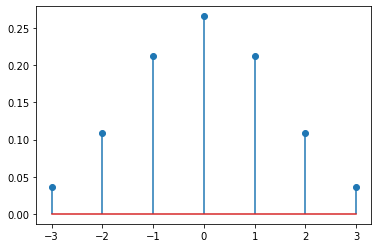

In [4]:
# 1.2
n = 7
sigma = 1.5
f, x_osa = osum.gaussian(n, sigma)
print(f)

# 1.3
plt.figure()
plt.stem(x_osa, f)
# plt.show()

# 1.5
H = np.outer(f, f)
print(H)

# 1.6
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# # [x, y] = np.meshgrid(np.arange(0, n), np.arange(0, n))
# [x, y] = np.meshgrid(x_osa, x_osa)
# ax.plot_surface(x, y, H, cmap='viridis')
# plt.show()


2. Redukcija
  
  2.1 U glavnom modulu vezba3.py učitati sliku mr_glava_10.jpg u promenljivu im. Slika je tipa uint8.
  
  2.2 Promeniti tip slike u float32, a zatim je isfiltrirati niz vrste koristeći Gausov filtar definisan u koraku 1.5. Filtriranje raditi konvolucijom. Isfiltriranu sliku sačuvati u promenljivu a_f.
  
  2.3 Napraviti sliku a_f2 decimacijom a_f sa faktorom 2 niz vrste (odbaciti svaku drugu kolonu).
  
  2.4 a_f2 filtrirati niz kolone, pomoću operacije konvolucije, koristeći filtar f. Isfiltriranu sliku sačuvati u promenljivu b_f.
  
  2.5 Zatim sliku b_f decimirati faktorom 2 niz vrste, tj. odbaciti joj svaku drugu kolonu. Time se dobija slika b_f2.
  
  2.6 U osum.py modulu napraviti funkciju im_norm za normalizaciju slika na opseg [0,1].
  
  2.7 Prikazati sliku nakon svakog koraka 2.2-2.5. Preporuka je da se prikazuju
normalizovane slike. Kojih su dimenzija slike. Šta predstavlja slika b_f2? Kako se razlikuje od originalne slike?

In [5]:
# plt.show()
# 2.1
im = cv2.imread('mr_glava_1.jpg', cv2.IMREAD_GRAYSCALE)
im = im.astype(np.float32)

# Redukcija
# 2.2
# nearest - prosirenje slike zbog filtriranja ponavljanjem ivicnih piksela
a_f = convolve1d(im, f, axis=1, mode='nearest')
# 2.3
a_f2 = a_f[:,::2]
# 2.4
b_f = convolve1d(a_f2, f, axis=0, mode='nearest')
# 2.5
# prvi nivo Gausove piramide
b_f2 = b_f[::2]

# 2.7
# cv2.imshow('Originalna slika', osum.im_norm(im))
# cv2.imshow('Filtriranje niz vrste', osum.im_norm(a_f))
# cv2.imshow('Decimacija niz vrste', osum.im_norm(a_f2))
# cv2.imshow('Filtriranje niz kolone', osum.im_norm(b_f))
# cv2.imshow('Decimacija niz kolone', osum.im_norm(b_f2))
# cv2.imshow('Prvi nivo Gausove piramide', osum.im_norm(b_f2))
# cv2.waitKey(0)
# cv2.destroyAllWindows()


3. Ekspanzija
  
  3.1 Upisati vrstu nula iza svake vrste slike b_f2. Novu sliku nazvati c.
  
  3.2 Filtrirati sliku c niz kolone filtrom 2f, koristeći konvoluciju. Sačuvati isfiltriranu sliku u
promenljivu c_f.
  
  3.3 Sada iza svake kolone slike c_f dodati kolonu nula. Sliku sačuvati kao promenljivu d.
  
  3.4 Sliku d_f napraviti filtriranjem slike d filtrom 2f niz vrste.
  
  3.5 Prikazati sliku nakon svakog koraka. Kako se menjaju dimenzije slike? Koje efekte
primećujete nakon svakog koraka?
  
  3.6 Napraviti prvi nivo Laplasove piramide kao razliku im i d_f.
  
  3.7 Prikazati ovu sliku. Kako izgleda slika? Šta predstavljaju najsvetliji i najtamniji pikseli a
šta srednji nivoi sivog?
  
  3.8 Prikazati apsolutnu vrednost ove slike? Šta se vidi na njoj?

In [6]:
# Ekspanzija
# 3.1
c = np.insert(b_f2, range(1, b_f2.shape[0]+1), 0, axis=0)
# 3.2
c_f = convolve1d(c, 2*f, axis=0, mode='nearest')
# 3.3
d = np.insert(c_f, range(1, c_f.shape[1]+1), 0, axis=1)
# 3.4
d_f = convolve1d(d, 2*f, axis=1, mode='nearest')

# 3.5
# cv2.imshow('Originalna slika', osum.im_norm(im))
# cv2.imshow('Dodate nule iza svake vrste', osum.im_norm(c))
# cv2.imshow('Filtriranje niz kolone', osum.im_norm(c_f))
# cv2.imshow('Dodate nule iza svake kolone', osum.im_norm(d))
# cv2.imshow('Filtriranje niz vrste', osum.im_norm(d_f))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 3.6
# Prvi nivo Laplasove piramide
l = im-d_f

# 3.7
l = l.astype(np.int16)
# plt.figure()
# plt.imshow(l, cmap='gray', vmin=l.min(), vmax=l.max())
# plt.axis('off')
# plt.title('Slika detalja na prvom nivou rezolucije')
# plt.show()

# # 3.8
# plt.figure()
# plt.imshow(abs(l), cmap='gray', vmin=abs(l).min(), vmax=abs(l).max())
# plt.axis('off')
# plt.title('Apsolutna vrednost koeficijenata na prvom nivou Laplasove piramide')
# plt.show()


4. Piramide
  
  4.1 Isprobati funkcije za ekspanziju i redukciju iz openCV biblioteke.
  
  4.2 Iskoristiti ove funkcije za pravljenje funkcije im_pyr_decomp u modulu osum.py za razlaganje slike na piramide. Ulaz funkcije treba da bude slika i nivo razlaganja N, a izlaz Laplasova, Gausova piramida i rezidual (bazna slika).
  
  4.3 U glavnom modulu napraviti 3 nivoa Gausove i Laplasove piramide slike im. Radi poboljšanja prikaza, nivoe Laplasove piramide pre prikazivanja pomnožiti sa 5 i dodati im 128 i sliku prikazati na opsegu [0, 255]. Šta prikazuje Gausova, a šta Laplasova piramida? Šta se menja na svakoj iz nivoa u nivo?
  
  4.4 U modulu osum.py napraviti funkciju im_pyr_recon za rekonstrukciju slike pomoću Laplasove piramide i bazne slike.
  
  4.5 Rekonstruisati sliku im koristeći njenu nepromenjenu Laplasovu piramidu i rezidual. Kvantifikovati kvalitet rekonstrukcije sumom apsolutnih razlika između originalne i slike dobijene rekonstrukcijom. Koliko iznosi suma apsolutnih vrednosti i šta se može zaključiti iz tog rezultata?

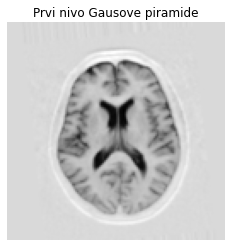

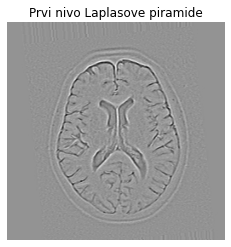

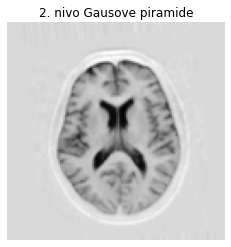

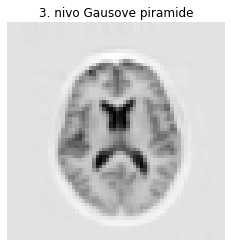

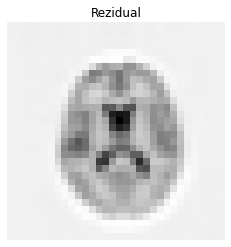

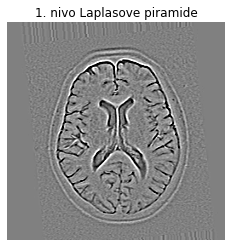

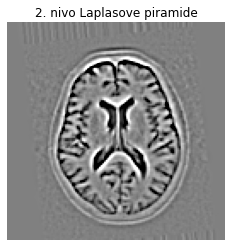

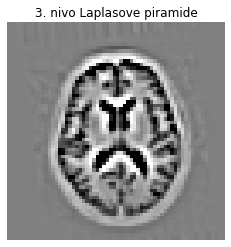

Suma apsolutnih razlika iznosi 0.0


In [7]:
# 4.1
# Redukcija
g = cv2.pyrDown(im, borderType=cv2.BORDER_REPLICATE)
# Ekspanzija
g_ex = cv2.pyrUp(g, cv2.BORDER_REPLICATE)

l = im - g_ex

plt.figure()
plt.imshow(g, cmap='gray', vmin=g.min(), vmax=g.max())
plt.axis('off')
plt.title('Prvi nivo Gausove piramide')
plt.show()

plt.figure()
plt.imshow(l, cmap='gray', vmin=l.min(), vmax=l.max())
plt.axis('off')
plt.title('Prvi nivo Laplasove piramide')
plt.show()

# 4.3
N_razl = 3
LPyr, GPyr, Res = osum.im_pyr_decomp(im, N_razl)

for i in range(1, N_razl):
    plt.figure()
    g = GPyr[i]
    plt.imshow(g, cmap='gray', vmin=g.min(), vmax=g.max())
    plt.axis('off')
    plt.title(str(i+1)+'. nivo Gausove piramide')
    plt.show()

plt.figure()
plt.imshow(Res, cmap='gray', vmin=Res.min(), vmax=Res.max())
plt.axis('off')
plt.title('Rezidual')
plt.show()

for i in range(0, N_razl):
    plt.figure()
    l = 5*LPyr[i]+128
    plt.imshow(l, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.title(str(i+1)+'. nivo Laplasove piramide')
    plt.show()

# 4.5
im_rec = osum.im_pyr_recon(LPyr, Res)
print('Suma apsolutnih razlika iznosi '+str(sum(sum(abs(im-im_rec)))))


5. Manipulacija Laplasove piramide
  
  5.1 Pomnožiti svaki nivo Laplasove piramide ponaosob faktorom 2 i zatim rekonstruisati
sliku koristeći tako modifikovanu piramidu. Prikazati originalnu sliku i slike dobijene
nakon rekonstrukcije nakon modifikacije svakog od nivoa. Šta je efekat ove
modifikacije i kako se manifestuje na različitim nivoima? Da li je rekonstrukcija
idealna?
  
  5.2 Ponoviti korake iz 5.1 koristeći faktor 5. Šta se promenilo?
  
  5.3 Za svaki nivo Laplasove piramide ponaosob, postaviti sve koeficijenta koji imaju
apsolutnu vrednost manju od 10 na 0. Rekonstruisati sliku nakon modifikacije svakog
nivoa i prikazati je. Koji je efekat ove modifikacije? Šta se dešava kada se suzbiju mali
koeficijenti na nižim, a šta navišim nivoima? Kakav je efekat na šum, a kakav na
kontrast?

  5.4 Ponoviti korake iz 5.3 koristeći prag 30. Analizirati efekte.

230161
427061
640503


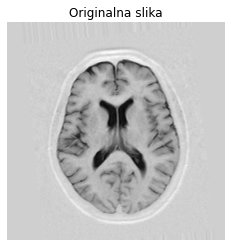

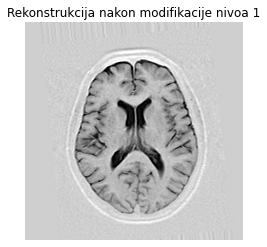

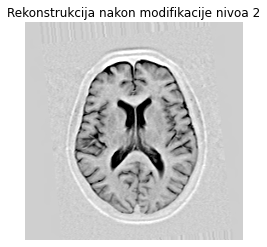

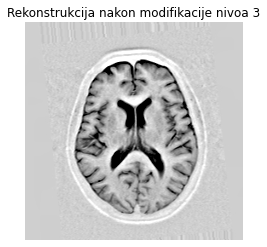

2346802
4000997
5741217


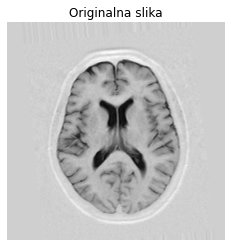

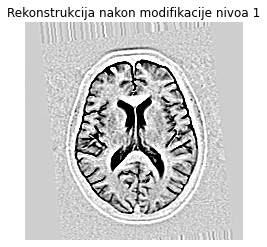

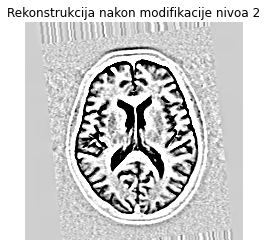

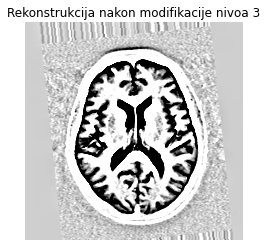

5726245
5703734
5685823


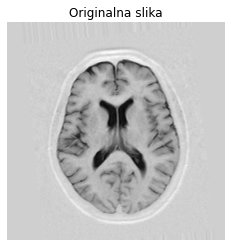

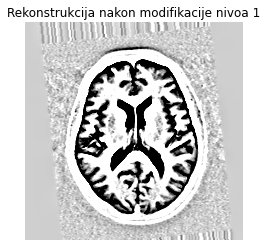

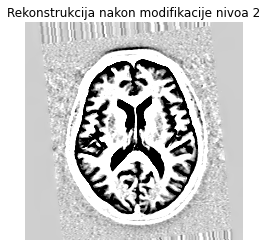

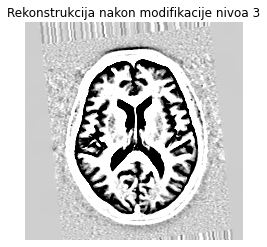

5532435
5451811
5402274


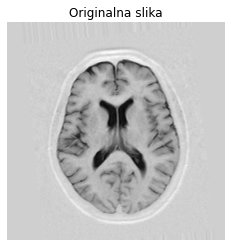

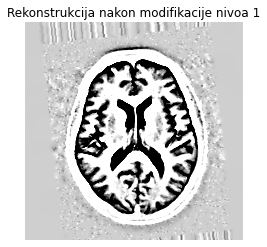

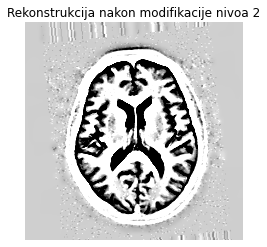

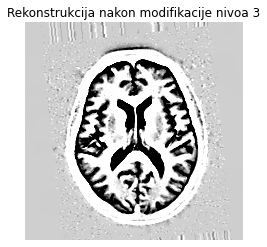

In [8]:
# 5.1
im = im.astype(np.int32)
plt.figure(10)
plt.imshow(im, cmap='gray', vmin=im.min(), vmax=im.max())
plt.axis('off')
plt.title('Originalna slika')

for i in range(N_razl):

    LPyr_tmp = LPyr
    LPyr_tmp[i] = LPyr[i]*2
    im_rec = osum.im_pyr_recon(LPyr_tmp, Res)
    im_rec = im_rec.astype(np.int32)

    plt.figure(i)
    plt.imshow(im_rec, cmap='gray', vmin=im.min(), vmax=im.max())
    plt.axis('off')
    plt.title('Rekonstrukcija nakon modifikacije nivoa '+str(i+1))
    print(sum(sum(abs(im-im_rec))))

plt.show()

# 5.2
im = im.astype(np.int32)
plt.figure(10)
plt.imshow(im, cmap='gray', vmin=im.min(), vmax=im.max())
plt.axis('off')
plt.title('Originalna slika')

for i in range(N_razl):
    LPyr_tmp = LPyr
    LPyr_tmp[i] = LPyr[i]*5
    im_rec = osum.im_pyr_recon(LPyr_tmp, Res)
    im_rec = im_rec.astype(np.int32)

    plt.figure(i)
    plt.imshow(im_rec, cmap='gray', vmin=im.min(), vmax=im.max())
    plt.axis('off')
    plt.title('Rekonstrukcija nakon modifikacije nivoa ' + str(i+1))
    print(sum(sum(abs(im - im_rec))))

plt.show()

# 5.3
im = im.astype(np.int32)
plt.figure(10)
plt.imshow(im, cmap='gray', vmin=im.min(), vmax=im.max())
plt.axis('off')
plt.title('Originalna slika')

for i in range(N_razl):
    ind = abs(LPyr[i]) < 10
    LPyr_tmp = LPyr
    LPyr_tmp[i][ind] = 0
    im_rec = osum.im_pyr_recon(LPyr_tmp, Res)
    im_rec = im_rec.astype(np.int32)

    plt.figure(i)
    plt.imshow(im_rec, cmap='gray', vmin=im.min(), vmax=im.max())
    plt.axis('off')
    plt.title('Rekonstrukcija nakon modifikacije nivoa ' + str(i + 1))
    print(sum(sum(abs(im - im_rec))))

plt.show()

# 5.4
im = im.astype(np.int32)
plt.figure(10)
plt.imshow(im, cmap='gray', vmin=im.min(), vmax=im.max())
plt.axis('off')
plt.title('Originalna slika')

for i in range(N_razl):
    ind = abs(LPyr[i]) < 30
    LPyr_tmp = LPyr
    LPyr_tmp[i][ind] = 0
    im_rec = osum.im_pyr_recon(LPyr_tmp, Res)
    im_rec = im_rec.astype(np.int32)

    plt.figure(i)
    plt.imshow(im_rec, cmap='gray', vmin=im.min(), vmax=im.max())
    plt.axis('off')
    plt.title('Rekonstrukcija nakon modifikacije nivoa ' + str(i + 1))
    print(sum(sum(abs(im - im_rec))))

plt.show()
